In [18]:
import pandas as pd
import seaborn as sns
from ASD_Data_Reader import Data_Reader
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# 3 types of asd measures: sky, water, white_reference
# 10 replicates

In [2]:
df1 = pd.read_csv('./processed_data/9mile/9mile_10_sky00000.asd.txt', sep='\t')
df2 = pd.read_csv('./processed_data/9mile/9mile_10_sky00001.asd.txt', sep='\t')
df3 = pd.read_csv('./processed_data/9mile/9mile_10_sky00002.asd.txt', sep='\t')

In [3]:
# rename columns
df1.columns = ["wavelength", "9mile_10_sky"]
df2.columns = ["wavelength", "9mile_10_sky"]
df3.columns = ["wavelength", "9mile_10_sky"]
rep10_9mile_sky = df1[["wavelength"]]

In [4]:
# compute the average of three asd sky measures
rep10_9mile_sky["9mile_sky_asd"] = (df1["9mile_10_sky"] + df2["9mile_10_sky"] + df3["9mile_10_sky"]) / 3

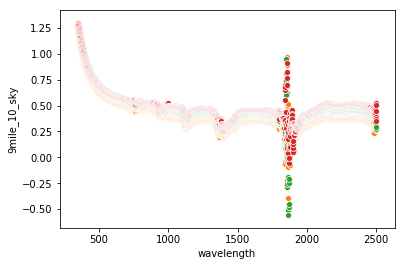

In [5]:
sns.scatterplot(x="wavelength", y="9mile_sky_asd", data=rep10_9mile_sky)
sns.scatterplot(x="wavelength", y="9mile_10_sky", data=df1)
sns.scatterplot(x="wavelength", y="9mile_10_sky", data=df2)
sns.scatterplot(x="wavelength", y="9mile_10_sky", data=df3)

In [6]:
t = Data_Reader(["scoter"])

In [7]:
data = t.get_raw_data()[0]
# data = data[data["rep_number"] == 5]
data = data[data["rep_name"] == "water"]
temp = data[["wavelength", "asd_measure"]]
mean = temp.groupby(["wavelength"])['asd_measure'].mean()
mean = mean.reset_index()

(370, 900)

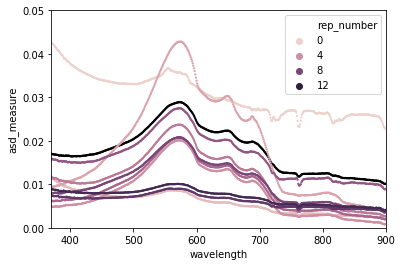

In [8]:
sns.scatterplot(x="wavelength", y="asd_measure", data=mean, color="black", edgecolor='none', s=5)
sns.scatterplot(x="wavelength", y="asd_measure", data=data, hue="rep_number", edgecolor='none', s=5)
plt.ylim(0, 0.05)
plt.xlim(370, 900)

In [9]:
yf17 = Data_Reader(["boot"])
data_yf17 = yf17.get_raw_data()[0]
data_yf17 = data_yf17[data_yf17["rep_name"] == "water"]
temp_yf17 = data_yf17[["wavelength", "asd_measure"]]
mean_yf17 = temp_yf17.groupby(["wavelength"])['asd_measure'].mean()
mean_yf17 = mean_yf17.reset_index()
print("done")

done


(370, 900)

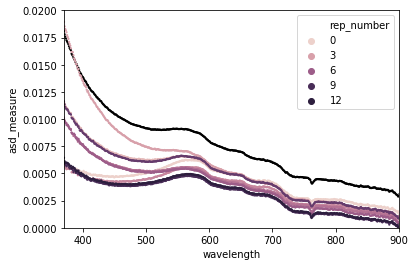

In [10]:
sns.scatterplot(x="wavelength", y="asd_measure", data=mean_yf17, color="black", edgecolor='none', s=5)
sns.scatterplot(x="wavelength", y="asd_measure", data=data_yf17, hue="rep_number", edgecolor='none', s=5)
plt.ylim(0, 0.02)
plt.xlim(370, 900)
# plt.savefig("test.png", dpi=300)

done generating plots


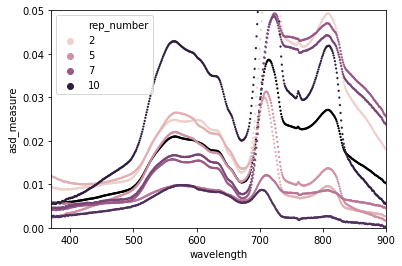

In [19]:
def generate_plots():
    lakes = ["yf20"]
    for lake in lakes:
        dr = Data_Reader([lake])
        data = dr.get_raw_data()[0]
        data = data[data["rep_name"] == "water"]
        temp = data[["wavelength", "asd_measure"]]
        mean = temp.groupby(["wavelength"])['asd_measure'].mean()
        mean = mean.reset_index()
        sns.scatterplot(x="wavelength", y="asd_measure", data=mean, color="black", edgecolor='none', s=5)
        sns.scatterplot(x="wavelength", y="asd_measure", data=data, hue="rep_number", edgecolor='none', s=5)
        plt.ylim(0, 0.05)
        plt.xlim(370, 900)
        plt.savefig(lake + "-water.png", dpi=300)

generate_plots()
print("done generating plots")